In [1]:
import sys
import nltk
from nltk import FreqDist
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as skl
from nltk.corpus import stopwords
from random import shuffle

In [2]:
df = pd.read_csv('blogtext.csv')
# drop the irrelevant columns
df = df.drop(['date', 'sign', 'topic', 'age', 'gender'], axis = 1)
df.head()

,id,text
0,2059027,"Info has been found (+/- 100 pages,..."
1,2059027,These are the team members: Drewe...
2,2059027,In het kader van kernfusie op aarde...
3,2059027,testing!!! testing!!!
4,3581210,Thanks to Yahoo!'s Toolbar I can ...


In [5]:
df.tail()

,id,text
681279,1713845,"Dear Susan, I could write some really ..."
681280,1713845,"Dear Susan, 'I have the second yeast i..."
681281,1713845,"Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,"Dear Susan: Just to clarify, I am as..."
681283,1713845,"Hey everybody...and Susan, You might a..."


In [30]:
df['id'].value_counts()[:20]

449628     4221
734562     2301
589736     2294
1975546    2261
958176     2244
1107146    2237
303162     2114
942828     2068
1270648    1951
1784456    1843
955372     1771
1078410    1731
1325355    1702
883178     1616
595404     1561
988941     1542
1093691    1533
1093457    1533
605396     1505
322624     1351
Name: id, dtype: int64

In [29]:
df['id'].value_counts().where(df['id'].value_counts() < 100).dropna()

3545562    99.0
3947013    99.0
946952     99.0
939313     99.0
2462546    99.0
           ... 
3993280     1.0
3483063     1.0
4165047     1.0
3575447     1.0
3599127     1.0
Name: id, Length: 17946, dtype: float64

number of posts:  23534


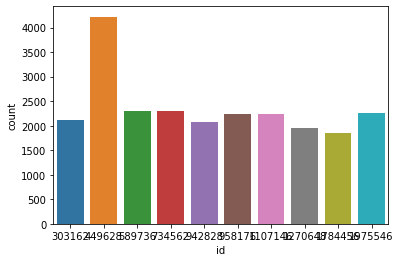

In [31]:
top_authors = df['id'].value_counts()[:10].index.tolist()

# drop the rows that doesnt belong to authors who in the top 10 list
df = df[df['id'].isin(top_authors)]

df.reset_index(drop=True, inplace=True)

sns.countplot(df['id'], label="count")

print("number of posts: ",len(df))

In [32]:
df.head()

,id,text
0,589736,Much funny. 2 points. As mentioned in the...
1,589736,"Harpers, Harpers, everywhere. Harpers, Har..."
2,589736,"In an earlier post, Johnathan said: 'And ..."
3,589736,"I'd post this on the RTG Blog, but I can't..."
4,589736,The answer to the first question lies with ...


In [37]:
for i in range(len(df)):
    df.loc[i] = [df.loc[i].id, nltk.word_tokenize(df.loc[i].text), '0']

In [ ]:
for i in range(len(df)):
    if( len(df.loc[i].text) == 0 ):
        df = df.drop([df.loc[i].name])

        
df.reset_index(drop=True, inplace=True)

In [82]:
df['richness'] = '0'

for i in range(len(df)):
    df.loc[i] = [df.loc[i].id, df.loc[i].text, (len(set(df.loc[i].text)) / len(df.loc[i].text))]

In [83]:
df.tail()

,id,text,richness
23499,1270648,"[urlLink, http, :, //www.sciencenews.org/, is,...",1
23500,1270648,"[is, there, any, other, sources, that, describ...",0.755556
23501,1270648,"[Yeah, ,, this, whole, field, is, quite, facin...",0.738739
23502,1270648,"[Actually, ,, my, comment, it, was, genuine, ....",0.824742
23503,1270648,"[Vlad, your, contempt, is, out, of, place, her...",0.717557


In [99]:
sample = df[df['id'].isin(['1975546','1784456'])]

In [100]:
sample

,id,text,richness
10865,1784456,"[Hey, Izzy, when, or, if, you, come, on, this,...",0.95
10866,1784456,"[Msn, does, n't, work, ., It, 's, official, .,...",0.479042
10867,1784456,"[Wow, ,, who, have, n't, I, been, blocked, by,...",0.909091
10868,1784456,"[Umm, that, 's, a, que, for, the, new, templat...",1
10869,1784456,"[Hmm, well, my, brothers, going, in, the, loft...",0.621849
...,...,...,...
21552,1975546,"['We, declared, war, on, terrorits, not, even,...",0.875
21553,1975546,"[Mir, has, informed, me, that, my, earlier, po...",0.786885
21554,1975546,"[This, is, my, virgin, post, ,, so, I, thought...",0.75188
21555,1975546,"[same, feed, from, before, ,, but, this, one, ...",0.54


In [101]:
data = pd.concat([sample['id'], sample['richness']], axis=1)
data

,id,richness
10865,1784456,0.95
10866,1784456,0.479042
10867,1784456,0.909091
10868,1784456,1
10869,1784456,0.621849
...,...,...
21552,1975546,0.875
21553,1975546,0.786885
21554,1975546,0.75188
21555,1975546,0.54


In [102]:
data = pd.melt(data, id_vars="id",
                      var_name="richness",
                        value_name='value')
data

,id,richness,value
0,1784456,richness,0.95
1,1784456,richness,0.479042
2,1784456,richness,0.909091
3,1784456,richness,1
4,1784456,richness,0.621849
...,...,...,...
4089,1975546,richness,0.875
4090,1975546,richness,0.786885
4091,1975546,richness,0.75188
4092,1975546,richness,0.54


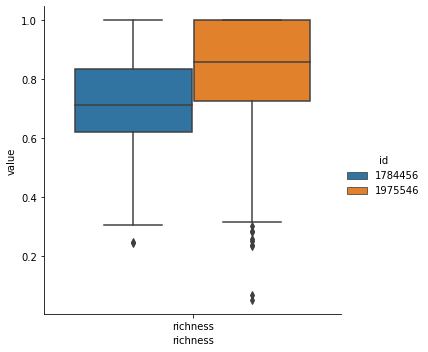

In [105]:
sns.catplot(x="richness", y="value", hue="id", data=data, kind="box")

In [112]:
df['wldist'] = '0'

for i in range(len(df)):
    df.loc[i] = [df.loc[i].id, df.loc[i].text, df.loc[i].richness, FreqDist(len(w) for w in df.loc[i].text)]

In [113]:
df.head()

,id,text,richness,wldist
0,589736,"[Much, funny, ., 2, points, ., As, mentioned, ...",0.787234,"{4: 10, 5: 5, 1: 13, 6: 2, 2: 6, 9: 2, 3: 4, 8..."
1,589736,"[Harpers, ,, Harpers, ,, everywhere, ., Harper...",0.44086,"{7: 21, 1: 42, 10: 1, 4: 8, 6: 4, 2: 7, 5: 5, ..."
2,589736,"[In, an, earlier, post, ,, Johnathan, said, :,...",0.504587,"{2: 65, 7: 15, 4: 60, 1: 52, 9: 6, 6: 18, 3: 5..."
3,589736,"[I, 'd, post, this, on, the, RTG, Blog, ,, but...",0.55641,"{1: 55, 2: 71, 4: 49, 3: 83, 5: 24, 7: 23, 6: ..."
4,589736,"[The, answer, to, the, first, question, lies, ...",0.827586,"{3: 6, 6: 5, 2: 4, 5: 3, 8: 2, 4: 4, 1: 3, 9: ..."


In [118]:
fqd = df.loc[0].wldist

In [121]:
import matplotlib.pyplot as pltplot

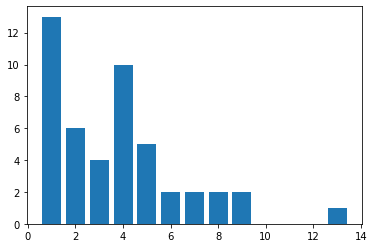

In [124]:
pltplot.bar(*zip(*sorted(fqd.items())))
pltplot.show()

In [127]:
fqd.most_common()

[(1, 13),
 (4, 10),
 (2, 6),
 (5, 5),
 (3, 4),
 (6, 2),
 (9, 2),
 (8, 2),
 (7, 2),
 (13, 1)]